<a href="https://colab.research.google.com/github/Ruborcalor/CNN_NMIST/blob/master/Kaggle_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
!rm sample_submission.csv
!rm submission.csv

rm: cannot remove 'sample_submission.csv': No such file or directory
rm: cannot remove 'submission.csv': No such file or directory


In [4]:
!kaggle competitions download -c mais202-fall2019

100% 20.7M/20.7M [00:00<00:00, 24.8MB/s]

  0% 0.00/127 [00:00<?, ?B/s]
100% 127/127 [00:00<00:00, 125kB/s]
  0% 0.00/429k [00:00<?, ?B/s]
100% 429k/429k [00:00<00:00, 131MB/s]
 79% 41.0M/51.7M [00:00<00:00, 52.9MB/s]
100% 51.7M/51.7M [00:00<00:00, 88.1MB/s]
  0% 0.00/165k [00:00<?, ?B/s]
100% 165k/165k [00:00<00:00, 54.3MB/s]


In [5]:
!unzip /content/train_images.npy.zip
!unzip /content/test_images.npy.zip

Archive:  /content/train_images.npy.zip
  inflating: train_images.npy        
Archive:  /content/test_images.npy.zip
  inflating: test_images.npy         


In [6]:
train_images = np.load("train_images.npy")
test_images = np.load("test_images.npy")

train_labels = np.loadtxt(open("train_labels.csv", "rb"), delimiter=",", skiprows=1)
train_labels = train_labels[:, 1]

train_images, test_images = train_images / 255.0, test_images / 255.0

train_images = train_images.reshape(*train_images.shape, 1)
test_images = test_images.reshape(*test_images.shape, 1)

from sklearn.model_selection import train_test_split
train_images, valid_images, train_labels, valid_labels = train_test_split(train_images, train_labels, test_size=0.1, random_state=12345)

print(train_images.shape)
print(valid_images.shape)
print(train_labels.shape)
print(valid_labels.shape)

(45000, 28, 28, 1)
(5000, 28, 28, 1)
(45000,)
(5000,)


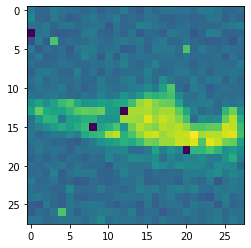

In [7]:
import matplotlib.pyplot as plt

def show_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    plt.show()

show_image(train_images[3]) # 0 is the index of the training image you want to display

In [8]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

TensorFlow 2.x selected.


In [32]:
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = (28, 28, 1)),
#   tf.keras.layers.MaxPooling2D(pool_size=2),
#   tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'),
#   tf.keras.layers.MaxPooling2D(pool_size=2),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(10, activation='softmax')
# ])
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu',input_shape = (28, 28, 1)),
#     tf.keras.layers.MaxPooling2D(pool_size=2) ,
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu'),
#     tf.keras.layers.Conv2D(filters=32,kernel_size=5,activation='relu'),
#     tf.keras.layers.MaxPooling2D(pool_size=2) ,
#     tf.keras.layers.Flatten(), # flatten out the layers
#     tf.keras.layers.Dense(128,activation='relu'),
#     tf.keras.layers.Dense(10,activation = 'softmax')
# ])
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), padding="same", activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Dropout(0.10), 
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, 5, padding="same", activation='relu'),
    tf.keras.layers.Dropout(0.20), 
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.20), 
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
dropout_28 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 14, 14, 64)        51264     
_________________________________________________________________
dropout_29 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 3136)            

In [0]:
model.fit(train_images, train_labels,  epochs=25, validation_data=(valid_images, valid_labels))

Train on 45000 samples, validate on 5000 samples
Epoch 1/25
45000/45000 [==============================] - 15s 329us/sample - loss: 0.6839 - accuracy: 0.7406 - val_loss: 0.4833 - val_accuracy: 0.8344
Epoch 2/25
45000/45000 [==============================] - 13s 289us/sample - loss: 0.4698 - accuracy: 0.8262 - val_loss: 0.4080 - val_accuracy: 0.8548
Epoch 3/25
45000/45000 [==============================] - 13s 290us/sample - loss: 0.4149 - accuracy: 0.8471 - val_loss: 0.3775 - val_accuracy: 0.8646
Epoch 4/25
45000/45000 [==============================] - 13s 289us/sample - loss: 0.3770 - accuracy: 0.8604 - val_loss: 0.3779 - val_accuracy: 0.8540
Epoch 5/25
45000/45000 [==============================] - 13s 292us/sample - loss: 0.3513 - accuracy: 0.8682 - val_loss: 0.3347 - val_accuracy: 0.8794
Epoch 6/25
45000/45000 [==============================] - 13s 291us/sample - loss: 0.3314 - accuracy: 0.8759 - val_loss: 0.3550 - val_accuracy: 0.8658
Epoch 7/25
45000/45000 [=====================

In [12]:
model.fit(train_images, train_labels,  epochs=15, validation_data=(valid_images, valid_labels))

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
45000/45000 [==============================] - 12s 260us/sample - loss: 0.2831 - accuracy: 0.8905 - val_loss: 0.3478 - val_accuracy: 0.8740
Epoch 2/15
45000/45000 [==============================] - 12s 259us/sample - loss: 0.2752 - accuracy: 0.8941 - val_loss: 0.3542 - val_accuracy: 0.8786
Epoch 3/15
45000/45000 [==============================] - 12s 268us/sample - loss: 0.2680 - accuracy: 0.8972 - val_loss: 0.3478 - val_accuracy: 0.8820
Epoch 4/15
45000/45000 [==============================] - 12s 260us/sample - loss: 0.2629 - accuracy: 0.8975 - val_loss: 0.3506 - val_accuracy: 0.8788
Epoch 5/15
45000/45000 [==============================] - 12s 258us/sample - loss: 0.2601 - accuracy: 0.8993 - val_loss: 0.3535 - val_accuracy: 0.8794
Epoch 6/15
45000/45000 [==============================] - 12s 259us/sample - loss: 0.2512 - accuracy: 0.9016 - val_loss: 0.3565 - val_accuracy: 0.8812
Epoch 7/15
45000/45000 [=====================

In [0]:
model.evaluate(x_test,  y_test, verbose=2)

In [0]:
# for generating submission

y_test = model.predict(test_images)
y_test = np.argmax(y_test, axis=1)
print(y_test.shape)

df_test = pd.read_csv('sample_submission.csv')
df_test['label'] = y_test2
df_test.to_csv('submission.csv', index=False)

In [0]:
from google.colab import drive
drive.mount('/content/drive')